In [45]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib inline

sns.set(style='white')

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

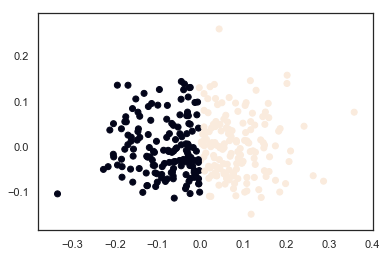

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [53]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [5]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

696 µs ± 92.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        7  153
1      142    1


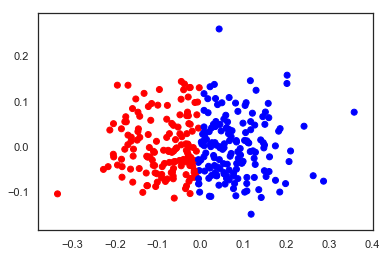

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini, cmap='bwr')
plt.show()

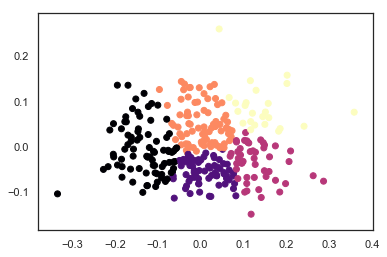

Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      81   0
1      32  36
2       0  48
3      36  46
4       0  24


In [56]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini, cmap='magma')
plt.show()

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

I like 5 clusters the best due to clusters 0, 2, & 4 being 100% in one group. Group 0 is all no heart disease, and grops 2 and 4 are all categorized within heart disease. By creating five clusters we are only mis-classifying 68 of the ~300 samples, which is much better than the K-means or MiniBatchKmeans 2 cluster solutions.

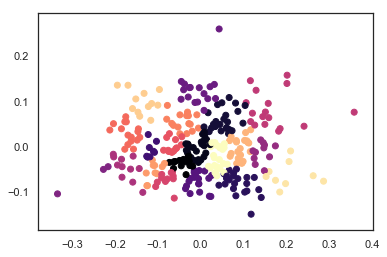

Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      14   0
1      13  12
2       0  25
3       0  22
4       8   0
5      14   5
6       9   8
7       3   0
8       0  11
9      11   0
10      0  17
11     11   0
12     12   0
13     16   0
14     16   0
15     10   0
16      0  21
17     12   0
18      0   9
19      0  24


In [58]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=20,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini, cmap='magma')
plt.show()

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Complexity does start to be an issue here. It makes interpretability very difficult and is likely overfitting to characteristics between clusters that don't amonut to being indicative of heart disease or not. If we assume in the table below the chart that the cluster should be defined by the dominant class (i.e. 13 zeroes and 12 ones would mean that cluster should be a 0), then we can characterize the misclassification of each cluster. The total misclassification here is much less than the 5 cluster solution (25 errors here compared to 68 in 5 cluster model). The boundary lines between clusters are also getting blurred when invoking this many divisions.